In [1]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt

import sys
sys.path.append( '../src')
from funcs import *

In [2]:
prop_2016 = pd.read_csv('../Data/01_raw/properties_2016.csv', low_memory=False)
train_2016 = pd.read_csv('../Data/01_raw/train_2016.csv', low_memory=False)
pd.set_option('display.max_columns', None)

In [4]:
df_2016 = train_2016.merge(prop_2016, how='left', on='parcelid')

In [6]:
df_2016.to_csv('properties.csv', index=False, float_format='%.4f')

In [4]:
del train_2016; gc.collect()

15

## Column selection

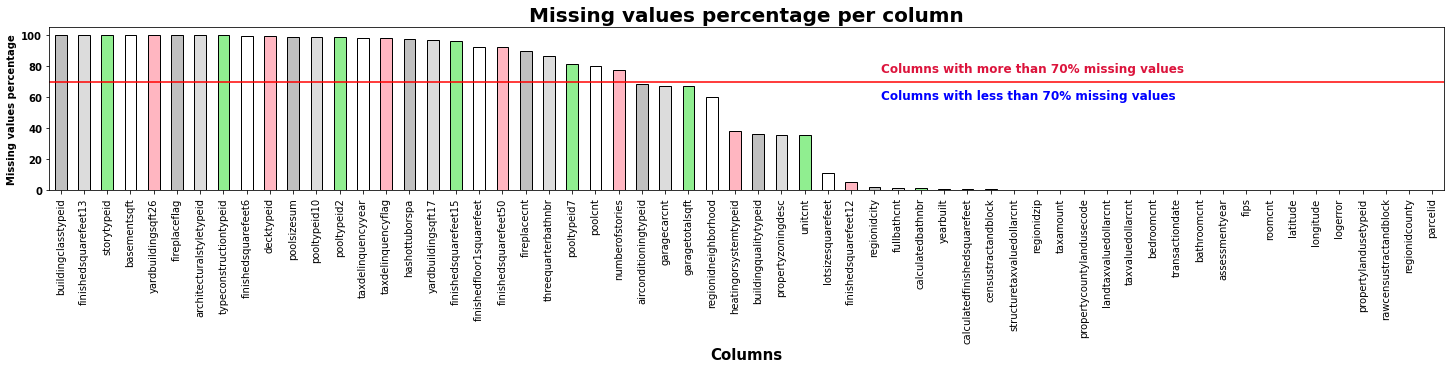

In [5]:
def total_missing_values(data, thresh=70, color='black', edgecolor='black', width=25, height=3):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

total_missing_values(df_2016, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

In [6]:
# Remove columns with more than 70% missing values
nb_rows = df_2016.shape[0]
df_2016 = df_2016.dropna(thresh=nb_rows * 0.3, axis=1)

In [7]:
# change transactiondate object format to datetime format
df_2016['transactiondate'] = pd.to_datetime(df_2016['transactiondate'], format="%Y-%m-%d %H:%M:%S")
df_2016['transaction_day'] = df_2016['transactiondate'].dt.dayofweek
df_2016['year'] = pd.DatetimeIndex(df_2016['transactiondate']).year
df_2016['month'] = pd.DatetimeIndex(df_2016['transactiondate']).month

In [8]:
# keep relevant columns to predice house price only
columns = ['parcelid', 'logerror', 'airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'regionidcity', 'unitcnt', 'yearbuilt']

df = df_2016[columns]

In [9]:
del columns; gc.collect()

10648

## Handle NaN values

In [13]:
df = df.drop_duplicates()